# Caltech Talk 2025 March 4
## Adaptive Algorithms for Cones of Input Functions
### Fred J. Hickernell

This demo makes use of our QMCPy software package.  See [qmcpy.org](www.qmcpy.org) for more details.

### Some LaTeX macros (hidden in math mode)
$
\newcommand{\vh}{\boldsymbol{h}}
\newcommand{\vt}{\boldsymbol{t}}
\newcommand{\vx}{\boldsymbol{x}}
\newcommand{\vX}{\boldsymbol{X}}
\newcommand{\cf}{\mathcal{F}}
\newcommand{\cu}{\mathcal{U}}
\newcommand{\dif}{\mathrm{d}}
\newcommand{\Ex}{\mathbb{E}}
\DeclareMathOperator{\disc}{disc}
\newcommand{\norm}[2][{}]{{\left \lVert #2 \right \rVert}_{#1}}
$

#### If are running this notebook in on colab, replace False in the next cell by True

In [2]:
if False:  #Running on colab?
    !sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
    !sudo apt install cm-super
    !pip install git+https://github.com/QMCSoftware/QMCSoftware.git@MCQMC2024

### Import needed packages

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import math
import numpy as np
import scipy as sp
import qmcpy as qp
import sympy as sy
#from scipy import stats
#from copy import deepcopy
import time
import timeit
import pickle
import sys
np.seterr(divide='raise', invalid='raise') #check for divide by zeros

#These are parameters needed for figures
figpath = 'Caltech2025MarchFigures/' #this path sends the figures to the directory that you want
savefigs = True  #save the figures on your disk if True
imgfrmt = 'pdf' #kind of format to save figures as
long_compute = False #redo the long computations
font_family = "serif"
plt.rcParams.update({
    "font.family" : font_family,
    "text.usetex" : True,  
    "mathtext.fontset" : "dejavuserif",
    "axes.labelsize" : 18,
    "axes.titlesize" : 18,
    "xtick.labelsize" : 14,
    "ytick.labelsize" : 14
})

In [4]:
import matplotlib.colors as mcolors

def lighten_color(color, factor=1.5):
    """Lightens the given color by blending it with white. 
    Factor > 1 makes it lighter, factor < 1 makes it darker."""
    rgb = mcolors.to_rgb(color)  # Convert color to RGB tuple
    lighter_rgb = tuple(min(1, c + (1 - c) * (factor - 1)) for c in rgb)  # Blend with white
    return lighter_rgb

# for plotting, here are our different symbols and their colors
# because plots may be printed in black and white we want different colors to have different marker shapes 
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']  #get the color cycle
[py_blue, py_orange, py_green, py_red, py_purple, py_brown, py_pink, py_gray, py_yellow, py_cyan] = color_cycle[0:10]
blue_symbol = {"color" : py_blue,
               "marker" : ".",
               "markersize" : 15,
               "linestyle" : ""
               }
orange_symbol = {"color" : py_orange,
               "marker" : "d",
               "markersize" : 12,
               "linestyle" : ""
               }
green_symbol = {"color" : py_green,
               "marker" : "s",
               "markersize" : 10,
               "linestyle" : ""
               }
red_symbol = {"color" : py_red,
               "marker" : "^",
               "markersize" : 10,
               "linestyle" : ""
               }
purple_symbol = {"color" : py_purple,
               "marker" : "v",
               "markersize" : 10,
               "linestyle" : ""
               }
brown_symbol = {"color" : py_brown,
               "marker" : ">",
               "markersize" : 10,
               "linestyle" : ""
               }
pink_symbol = {"color" : py_pink,
               "marker" : "<",
               "markersize" : 10,
               "linestyle" : ""
               }
symbol_args=[blue_symbol,orange_symbol,green_symbol,red_symbol,purple_symbol,brown_symbol,pink_symbol]

#lighter or darker versions of colors
lighter_py_blue = lighten_color(py_blue, factor=1.5)


## Bisection example

Find an approximation $\hat{x}$ to $x_* \in [a,b]$ such that $f(x_*) = 0$.

### Show the bisection algorithm by plots

In [5]:
#Test function
f = lambda x : x*np.exp(-x) - 0.2

In [6]:
#Parameters
tol = 0.05 #tolerance 
a = 0.3
b = 5
c = (a+b)/2
fa = f(a)
fb = f(b)
fc = f(c)
print(fa,fb)
print(np.sign(fa)*np.sign(fb) <=0)

0.02224546620451534 -0.1663102650045727
True


In [7]:
#Algorithm for carrying out the bisection method with plots
def bisection(f,a,b,tol):  
    fa = f(a)
    fb = f(b)
    xplot = np.linspace(a,b,200)
    fplot = f(xplot)
    pad = 0.2
    xmin = a-pad
    xmax = b+pad
    ymin = -0.2
    ymax = 0.2
    xval = np.array([a,b])
    yval = np.array([fa,fb])
    aspect_ratio = 3
    iter = 0
    fig, ax = plt.subplots(subplot_kw={'aspect': aspect_ratio})
    ax.plot(np.array([xmin,xmax]),np.array([0,0]),'-',color = 'k')
    ax.scatter(xval,yval,color = py_blue)
    ax.text(a,0,'[',color = 'k',fontsize = 18,ha='center', va='center')
    ax.text(b,0,']',color = 'k',fontsize = 18,ha='center', va='center')
    ax.set_xlim(xmin,xmax)
    ax.set_ylim(ymin,ymax)
    ax.set_axis_off()  
    fig.savefig(figpath+f"bisection_{iter}."+imgfrmt,format=imgfrmt,bbox_inches='tight')
    c = (a+b)/2
    fc = f(c)
    ax.scatter(c,fc)
    if np.sign(fa) == 0:
        return np.array([a,a,b])
    elif np.sign(fb) == 0:
        return np.array([b,a,b])
    else:
        while np.abs(b-c) > tol:
            iter = iter+1
            fig, ax = plt.subplots(subplot_kw={'aspect': aspect_ratio})
            ax.plot(np.array([xmin,xmax]),np.array([0,0]),'-',color = 'k')
            ax.scatter(xval,yval,color = py_blue)
            ax.text(a,0,'[',color = 'k',fontsize = 18,ha='center', va='center')
            ax.text(b,0,']',color = 'k',fontsize = 18,ha='center', va='center')
            ax.scatter(c,fc,color = py_orange)
            ax.set_xlim(xmin,xmax)
            ax.set_ylim(ymin,ymax)
            ax.set_axis_off()         
            fig.savefig(figpath+f"bisection_{iter}."+imgfrmt,format=imgfrmt,bbox_inches='tight')
            xval=np.append(xval,c)
            yval=np.append(yval,fc)
            if np.sign(fc) == 0:
                a = c
                fa = fc
                b = c
                fb = fc
            elif np.sign(fc) == np.sign(fa):
                a = c
                fa = fc
            else:
                b = c
                fb = fc
            c = (a+b)/2
            fc = f(c)
            #print(b-c)
        iter = iter+1
        ax.plot(xplot,fplot,color=py_blue)
        fig.savefig(figpath+f"bisection_{iter}."+imgfrmt,format=imgfrmt,bbox_inches='tight')
        return np.array([c,a,b])

[2.53984375 2.503125   2.5765625 ]


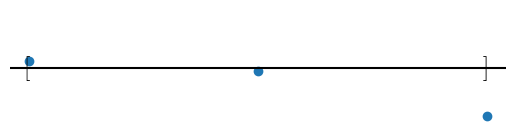

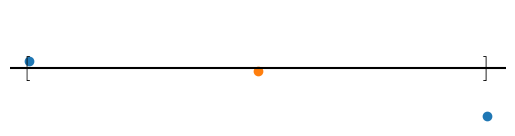

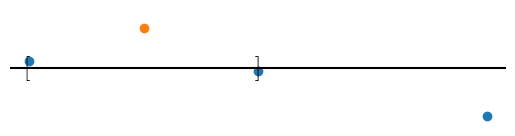

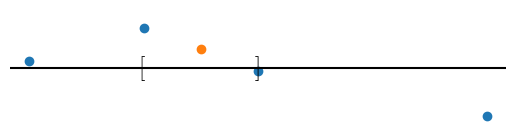

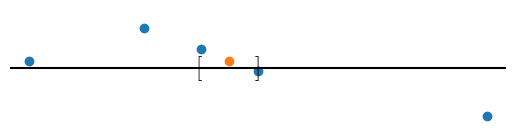

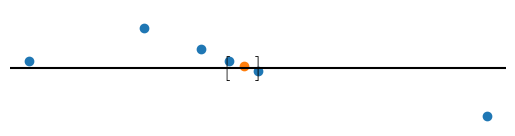

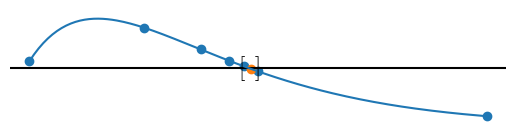

In [8]:
# Compute bisection
root = bisection(f,a,b,tol)
print(root)

## Trapezoidal rule

### Construct pathological function

#### Function to compute integral and variation

In [9]:
def int_var(f,fpp = None, xvec = None, tol = 1e-14):
    if np.any(xvec):
        a = xvec[0]
        b = xvec[1]
    else:
        a = 0
        b = 1
    intf, intferr = sp.integrate.quad(f, a, b, epsabs=tol)
    if fpp:
        varfp, varfperr = sp.integrate.quad(lambda x : np.abs(fpp(x)), a, b, epsabs=tol)
        if np.any(xvec):
            n = xvec.size-1
            varfpvec = np.zeros(n)
            for ii in range(xvec.size-1):
                varfpvec[ii],_ = sp.integrate.quad(lambda x : np.abs(fpp(x)), xvec[ii], xvec[ii+1], epsabs=tol)
        else:
            varfpvec = None
    else:
        varfp = None
        varfperr = None
        varfpvec = None
    return intf, varfp, varfpvec, intferr, varfperr

#### A one hump function 

In [10]:
#Use symbolic computation to get function and its second derivative
xx = sy.symbols('xx')
ff = 3*sy.exp(-10*(xx-1/2)**2)  #one hump
f = sy.lambdify(xx, ff, modules=["numpy"])
intf, intferr = sp.integrate.quad(f, 0, 1, epsabs=1e-15)
ffpp = sy.diff(ff,xx,2)
fpp = sy.lambdify(xx, ffpp, modules=["numpy"])
intf, varfp, _,_,_ = int_var(f,fpp)
print(f"Integral of f = {intf}\nVariation of f' = {varfp}")

Integral of f = 1.638875915355444
Variation of f' = 27.624750931916207


#### Wavy function

In [11]:
#Use symbolic computation to get wavy function and its second derivative
ncoarse = 6
ffwave = 1 - sy.cos(2* sy.pi*ncoarse*xx)  #function that is zero at xx_i = i/ncoarse
fwave = sy.lambdify(xx, ffwave, modules=["numpy"])
ffwavepp = sy.diff(ffwave,xx,2)
fwavepp = sy.lambdify(xx, ffwavepp, modules=["numpy"])
intfwave, _, _,_,_ = int_var(fwave) #cubature has problems with integrating the absolute value of a wavy function
_, varfwavep, _,_,_ = int_var(fwave,fwavepp,np.array([0,1/(4*ncoarse)]))  #so we take advantage of its periodicity
varfwavep = 4 * ncoarse * varfwavep
print(f"Integral of fwave = {intfwave}\nVariation of fwave' = {varfwavep}")

Integral of fwave = 1.0
Variation of fwave' = 904.7786842338605


In [12]:
xcoarse = np.linspace(0,1,ncoarse+1)
nfine = 2*ncoarse
xfine = np.linspace(0,1,nfine+1)

def trapquick(x,fx):  #quick trapezoidal rule
    heights = (fx[:-1]+fx[1:])/2
    widths = np.diff(x)
    T = np.sum(heights*widths)
    return T

Tfcoarse = trapquick(xcoarse,f(xcoarse))
Tffine = trapquick(xfine,f(xfine))
print(f"Trapezoidal rule for f on the coarse grid = {Tfcoarse} and on the fine grid = {Tffine}")

Tfwavecoarse = trapquick(xcoarse,fwave(xcoarse))
Tfwavefine = trapquick(xfine,fwave(xfine))
print(f"Trapezoidal rule for fwave on the coarse grid = {Tfwavecoarse} and on the fine grid = {Tfwavefine}")

alpha = (Tfwavefine - Tfwavecoarse)*(Tfcoarse - Tffine)  #used to make a function that has the same value of the trapezoidal rule on coarse and fine grids
fcombo = lambda x : f(x) + alpha*fwave(x)  #the pathological function
fcombopp = lambda x : fpp(x) + alpha*fwavepp(x)
intfcombo, varfcombop, _,_,_ = int_var(fcombo,fcombopp)
print(f"Integral of fcombo = {intfcombo}\nVariation of fcombo' = {varfcombop}")

Tfcombocoarse = trapquick(xcoarse,fcombo(xcoarse))
Tfcombofine = trapquick(xfine,fcombo(xfine))
Errfcombocoarse = np.abs(intfcombo - Tfcombocoarse)
Errfcombofine = np.abs(intfcombo - Tfcombofine)
print(f"Trapezoidal rule for fcombo on the coarse grid = {Tfcombocoarse} and on the fine grid = {Tfcombofine}")
print(f"Error of trapezoidal rule for fcombo on the coarse grid = {Errfcombocoarse} and on the fine grid = {Errfcombofine}")

Trapezoidal rule for f on the coarse grid = 1.6277006155168212 and on the fine grid = 1.6360391566677264
Trapezoidal rule for fwave on the coarse grid = 0.0 and on the fine grid = 1.0
Integral of fcombo = 1.630537374204539
Variation of fcombo' = 28.793867681040872
Trapezoidal rule for fcombo on the coarse grid = 1.6277006155168212 and on the fine grid = 1.6277006155168214
Error of trapezoidal rule for fcombo on the coarse grid = 0.002836758687717822 and on the fine grid = 0.0028367586877176


### Plot of trapezoidal rule

In [13]:
def plot_trap(xlist,fxlist,f = None, title = None, title_pos = 1, line_width = 0.5, edge_color = ['k','k'], aspect_ratio = 0.15, facecolors = [lighter_py_blue,py_yellow], dotcolors = [py_blue, py_orange]):
    fig, ax = plt.subplots(subplot_kw={'aspect': aspect_ratio})
    if not isinstance(xlist,list): #make it a list
        xlist = [xlist]
        fxlist = [fxlist]
    nlist = len(xlist)
    alpha = 0.4**(nlist-1)
    for jj in range(nlist):
        x = xlist[jj]
        fx = fxlist[jj]
        for ii in range(x.size-1):
            trapezoid = patches.Polygon([[x[ii],0],[x[ii],fx[ii]], [x[ii+1],fx[ii+1]], [x[ii+1],0]], \
                                        closed = True, linewidth=line_width, edgecolor=edge_color[jj], facecolor=facecolors[jj], alpha = alpha)
            ax.add_patch(trapezoid) 
        if jj > 0:
            mask = np.isin(x,xlist[jj-1])
            xadd = x[~mask]
            fxadd = fx[~mask]
            ax.scatter(xadd,fxadd,color = dotcolors[jj])
        else:
            ax.scatter(x,fx,color = dotcolors[jj])
    
    if f: #now plot the function, if given
        xplot = np.linspace(0,1,501)
        fplot = f(xplot)
        ax.plot(xplot,fplot,color = py_blue)
    
    ax.set_xlabel("$x$")
    ax.set_ylabel("$f(x)$")
    if title:
        fig.suptitle(f"{title}", y = title_pos)
    return fig


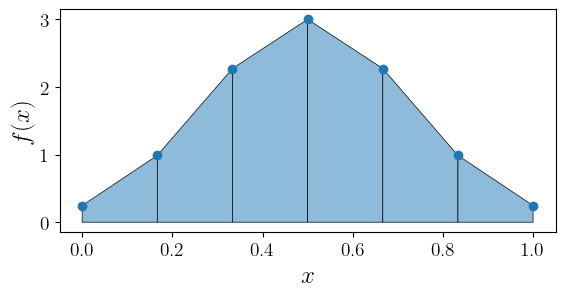

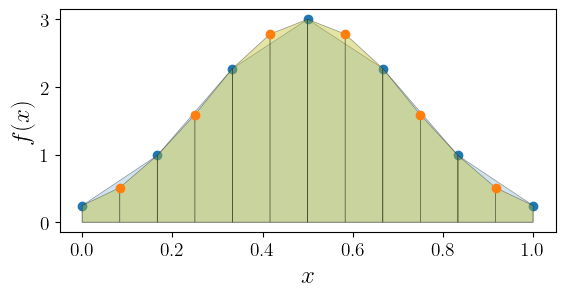

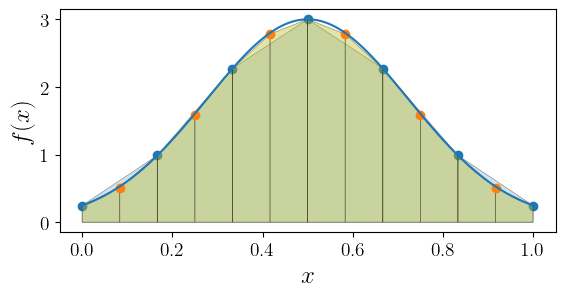

In [14]:
#ncoarse is the number of trapezoids
xcoarse = np.linspace(0,1,ncoarse+1)
fxcoarse = fcombo(xcoarse)
fig = plot_trap(xcoarse,fxcoarse)
fig.savefig(figpath+f"trapezoidal_rule_n_{ncoarse}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

nfine = 2*ncoarse
xfine =  np.linspace(0,1,nfine+1)
fxfine = fcombo(xfine)
fig = plot_trap([xcoarse,xfine],[fxcoarse,fxfine])
fig.savefig(figpath+f"trapezoidal_rule_n_{nfine}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

fig = plot_trap([xcoarse,xfine],[fxcoarse,fxfine],f)
fig.savefig(figpath+f"function_trapezoidal_rule_n_{nfine}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

### Adaptive sample size

#### Parmaters for our experiments

In [15]:
nmin = 5
fdg_0 = 2
err_tol = 1e-2

#### Functions for adaptive sample size

In [16]:
def fudge(h,nmin = 10,fdg_0 = 2):  #inflation factor
    return fdg_0/np.clip(1 - h*nmin,0,None) #make sure that it is positive

def varfpest(fvec,xvec):  #esitmate the variance of f' from values
    if np.array([xvec]).size == 1: #equally spaced
        varfp = np.sum(np.abs(np.diff(fvec,n=2))/xvec)
    else:
        varfp = np.sum(np.abs(np.diff(np.diff(fvec,n=1)/xvec,n=1)))
    return varfp
    

def trapadaptn(f,tol = 1e-3, nmin = 10, fdg_0 = 2, varfptrue = None):  #trapezoidal rule for equal-width trapezoids
    n = 2*nmin
    x = np.linspace(0,1,n+1) #initial equally spaced data sites
    fx = f(x)  #function data
    vfpest = varfpest(fx,1/n)  #lower bound on variation of f'
    varfpmin = vfpest  #running lower bound of variation of f'
    fppappx = fudge(1/n,nmin = nmin, fdg_0 = fdg_0)*vfpest  #upper bound on variation of f' if f is n cone
    varfpmax = fppappx  #running upper bound on variation of f' if f is n cone
    foutofcone = False
    if varfptrue: #check whether f might be outside the cone
        if fppappx < varfptrue:
            foutofcone = True
            print(f"out of cone for n = {n} because upper bound on Var(f') = {fppappx} and Var(f') = {intfpptrue}")
    errbd = fppappx/(8*n**2)
    while errbd > tol:
        xadd = x[:-1]+(x[1]-x[0])/2
        fadd = f(xadd)
        new = np.empty((2*n+1,), dtype = x.dtype)
        new[0::2] = x
        new[1:-1:2] = xadd
        x = new
        fnew = np.empty((2*n+1,), dtype = x.dtype)
        fnew[0::2] = fx
        fnew[1:-1:2] = fadd
        fx = fnew
        n = 2*n
        fppappx = fudge(1/n,nmin = nmin, fdg_0 = fdg_0)*varfpest(fx,1/n)
        vfpest = varfpest(fx,1/n)  #lower bound on variation of f'
        varfpmin = np.max([varfpmin,vfpest])  #running lower bound of variation of f'
        fppappx = fudge(1/n,nmin = nmin, fdg_0 = fdg_0)*vfpest  #upper bound on variation of f' if f is n cone
        varfpmax = np.min([varfpmax,fppappx])  #running upper bound on variation of f' if f is n cone
        if varfpmax < varfpmin:
            foutofcone = True
            print(f"out of cone for n = {n} because upper bound on Var(f') = {varfpmax} \
            is smaller than lower bound of Var(f') = {varfpmin}")
        if varfptrue:
            if fppappx < varfptrue:
                foutofcone = True
                print(f"out of cone for n = {n} because upper bound on Var(f') = {fppappx} and Var(f') = {intfpptrue}")
        errbd = fppappx/(8*n**2)
    T = (fx[0]+ 2*np.sum(fx[1:-1]) + fx[-1])/(2*n)
    rule_name = "adaptive samples size trapezoidal rule"
    return T, n, errbd, x, fx, rule_name, foutofcone

def print_trap_out(rule_name,T,n,errbd,intf,foutofcone = False,frmt = "0.5f"):
    print(f'The {rule_name} outputs \n \
    T_{n} = {T}, with an errorbound of {errbd:{frmt}},\n \
    which is less than the error tolerance of {err_tol:{frmt}},\n \
    and should be no less than the true error of {np.abs(intf-T):{frmt}},\n \
    The evidence that f is out of the cone is {foutofcone}')

#### Run the adaptive sample size algorithm

In [17]:
T, n, errbd, x, fx, rule_name, foutofcone = trapadaptn(fcombo, tol = err_tol, nmin = nmin, fdg_0 = fdg_0, varfptrue = varfcombop)
print_trap_out(rule_name,T,n,errbd,intfcombo,foutofcone)
#print(f'T_{n} = {T}, with an errorbound of {errbd:0.5f},\n which is less than the error tolerance of {err_tol:0.5f},\n and should be no less than the true error of {np.abs(intfcombo-T):0.5f}')

The adaptive samples size trapezoidal rule outputs 
     T_40 = 1.6302809656244968, with an errorbound of 0.00508,
     which is less than the error tolerance of 0.01000,
     and should be no less than the true error of 0.00026,
     The evidence that f is out of the cone is False


#### Plot the adaptive sample size algorithm

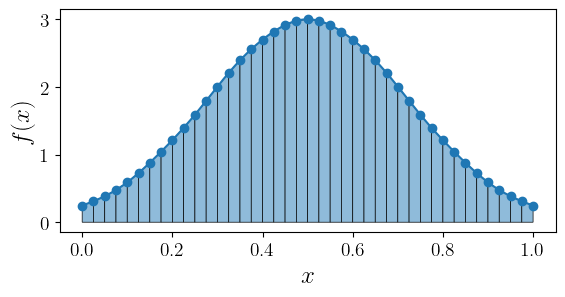

In [18]:
fig = plot_trap(x,fx,fcombo)
fig.savefig(figpath+f"adapt_n_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

#### Checking whether our functions are in the cone

In [19]:
def check_in_cone(f,varfp,nmin,fdg_0, nn = 14):
    nvec = nmin+1 + np.arange(nn)
    inout = np.full_like(nvec, fill_value="in", dtype="U3")
    varuppbd = np.inf
    for ii,n in enumerate(nvec):
        x = np.linspace(0,1,n+1)
        fx = f(x)    
        varuppbd_n = fudge(1/n,nmin = nmin, fdg_0 = fdg_0)*varfpest(fx,1/n)
        #print(varuppbd_n)
        if varuppbd_n < varfp:
            inout[ii] = "out"
        varuppbd = np.min([varuppbd, varuppbd_n])
    return varuppbd, varuppbd > varfp, inout

fcomboout = check_in_cone(fcombo,varfcombop,nmin,fdg_0)
NotIn_In = ["NOT in", "IN"]
print(f"variation of f' = {varfcombop}, the upper bound is {fcomboout[0]}, so the function is {NotIn_In[int(fcomboout[1])]} in the cone")
fout = check_in_cone(f,varfp,nmin,fdg_0)
print(f"variation of f' = {varfp}, the upper bound is {fout[0]}, so the function is {NotIn_In[int(fout[1])]} in the cone")
fwaveout = check_in_cone(fwave,varfwavep,nmin,fdg_0)
print(f"variation of f' = {varfwavep}, the upper bound is {fwaveout[0]}, so the function is {NotIn_In[int()]} in the cone")

variation of f' = 28.793867681040872, the upper bound is 74.83863598274944, so the function is IN in the cone
variation of f' = 27.624750931916207, the upper bound is 71.19385684096741, so the function is IN in the cone
variation of f' = 904.7786842338605, the upper bound is 0.0, so the function is NOT in in the cone


### Adaptive node selection

In [20]:
def errbd_interval(fvec,xvec,fudge,nmin,fdg_0):
    diff_x = np.diff(xvec,n=1)
    fpappx = np.diff(fvec,n=1)/diff_x #first order divided differences, derivatives somewhere 
    dfpappx = np.diff(fpappx)  #difference of the derivatives
    diff_2x = xvec[2:] - xvec[0:-2] #widths of two adjacent intervals
    varfpbd = np.array([fudge(diff_2x[0],nmin,fdg_0)*np.abs(dfpappx[0]), \
                        *np.max([fudge(diff_2x[:-1],nmin,fdg_0)*np.abs(dfpappx[:-1]), fudge(diff_2x[1:],nmin,fdg_0)*np.abs(dfpappx[1:])],axis = 0, keepdims = False), \
                        fudge(diff_2x[-1],nmin,fdg_0)*np.abs(dfpappx[-1])])  
    errbdinterval = varfpbd * (diff_x**2)/8  #error bound on each interval
    errbd = sum(errbdinterval)  #total error bound
    return errbd, errbdinterval, varfpbd

In [21]:
def trapadaptx(f,tol = 1e-3, nmin = 10, fdg_0 = 2):
    n = 3*nmin
    x = np.linspace(0,1,n+1)
    #print(f"x ={x}")
    fx = f(x)
    errbd, errbdvec, _ = errbd_interval(fx,x,fudge,nmin,fdg_0)
    while errbd > tol:
        which_split = np.argmax(errbdvec)
        xadd = (x[which_split]+x[which_split+1])/2
        #print("xadd = ", xadd)
        fadd = f(xadd)
        x = np.insert(x,which_split+1,xadd)
        fx = np.insert(fx,which_split+1,fadd)
        n = n + 1
        errbd, errbdvec, _ = errbd_interval(fx,x,fudge,nmin,fdg_0)
    T = np.sum(((fx[:-1]+fx[1:])/2)*np.diff(x))
    rule_name = "adaptive node placement trapezoidal rule"
    return T, n, errbd, x, fx, rule_name

The adaptive samples size trapezoidal rule outputs 
     T_40 = 1.6302809656244968, with an errorbound of 0.00508,
     which is less than the error tolerance of 0.01000,
     and should be no less than the true error of 0.00026,
     The evidence that f is out of the cone is False
The adaptive node placement trapezoidal rule outputs 
     T_36 = 1.6308051868101725, with an errorbound of 0.00963,
     which is less than the error tolerance of 0.01000,
     and should be no less than the true error of 0.00027,
     The evidence that f is out of the cone is False


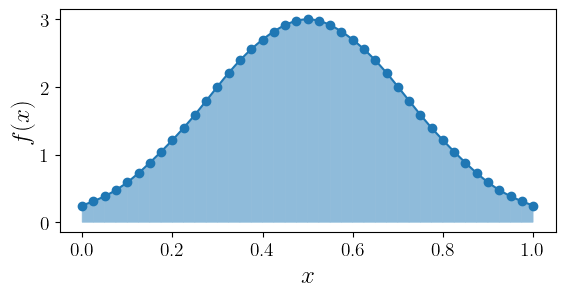

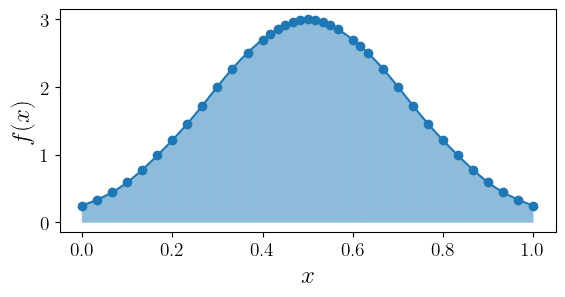

In [22]:
T, n, errbd, x, fx, rule_name, _ = trapadaptn(fcombo,tol = err_tol, nmin = nmin, fdg_0 = fdg_0)
print_trap_out(rule_name,T,n,errbd,intfcombo)
fig = plot_trap(x,fx,fcombo,edge_color = [lighter_py_blue])
fig.savefig(figpath+f"fcombo_adapt_n_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

T, n, errbd, x, fx, rule_name = trapadaptx(fcombo,tol = err_tol, nmin = nmin, fdg_0 = fdg_0)
print_trap_out(rule_name,T,n,errbd,intfcombo)
fig = plot_trap(x,fx,fcombo,edge_color = [lighter_py_blue])
fig.savefig(figpath+f"fcombo_adapt_x_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')


#### Find a function where adaptive node selection makes a difference

In [23]:
#Use symbolic computation to get function and its second derivative
xx = sy.symbols('xx')
ffpeak = 12*sy.exp(-400*(xx-0.2)**2)  #one hump
fpeak = sy.lambdify(xx, ffpeak, modules=["numpy"])
ffpeakpp = sy.diff(ffpeak,xx,2)
fpeakpp = sy.lambdify(xx, ffpeakpp, modules=["numpy"])
intfpeak, varfpeakp, _,_,_ = int_var(fpeak,fpeakpp)
print(f"Integral of f = {intfpeak}\nVariation of f' = {varfpeakp}")

Integral of f = 1.0634723023453962
Variation of f' = 823.4531140895541


The adaptive samples size trapezoidal rule outputs 
     T_320 = 1.0634723021702208, with an errorbound of 0.00204,
     which is less than the error tolerance of 0.00500,
     and should be no less than the true error of 0.00000,
     The evidence that f is out of the cone is False
The adaptive node placement trapezoidal rule outputs 
     T_70 = 1.0637524266502139, with an errorbound of 0.00499,
     which is less than the error tolerance of 0.00500,
     and should be no less than the true error of 0.00028,
     The evidence that f is out of the cone is False


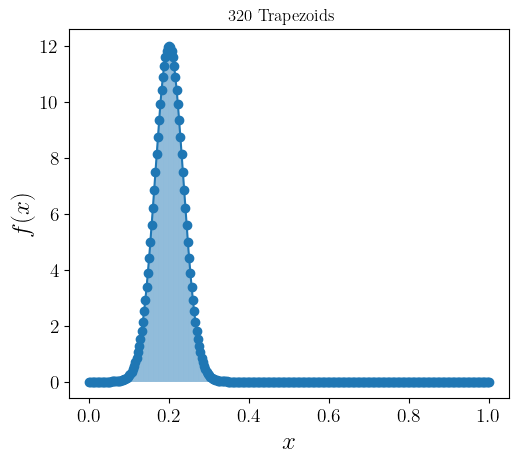

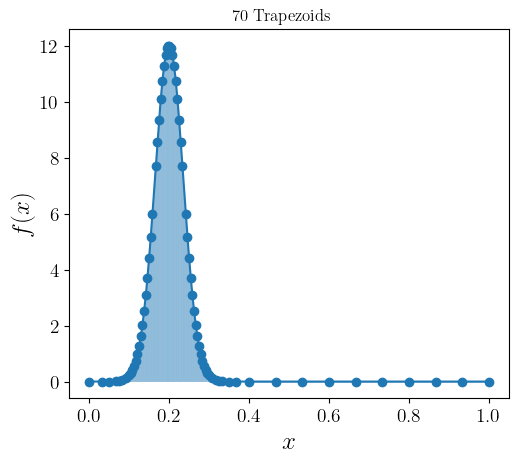

In [24]:
err_tol = 5e-3
T, n, errbd, x, fx, rule_name, _ = trapadaptn(fpeak,tol = err_tol, nmin = nmin, fdg_0 = fdg_0)
print_trap_out(rule_name,T,n,errbd,intfpeak)
fig = plot_trap(x,fx,fpeak,edge_color = [lighter_py_blue], title = f"{n} Trapezoids", title_pos = 0.92, aspect_ratio = 0.07)
fig.savefig(figpath+f"fpeak_adapt_n_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

T, n, errbd, x, fx, rule_name = trapadaptx(fpeak,tol = err_tol, nmin = nmin, fdg_0 = fdg_0)
print_trap_out(rule_name,T,n,errbd,intfpeak)
fig = plot_trap(x,fx,fpeak,edge_color = [lighter_py_blue], title = f"{n} Trapezoids", title_pos = 0.92, aspect_ratio = 0.07)
fig.savefig(figpath+f"fpeak_adapt_x_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')


### Compare adaptive sample size and adaptive node selection

In [25]:
tol_vec = np.geomspace(1e-2, 1e-8,20)
tol_min = np.min(tol_vec)
adapt_n_cost = np.zeros_like(tol_vec)
adapt_x_cost = np.zeros_like(tol_vec)

if long_compute:
    for ii, tol in enumerate(tol_vec):
        _, adapt_n_cost[ii], _, _, _, _, _ = trapadaptn(fpeak, tol = tol, nmin = nmin, fdg_0 = fdg_0)
        _, adapt_x_cost[ii], _, _, _, _ = trapadaptx(fpeak, tol = tol, nmin = nmin, fdg_0 = fdg_0)
    
    out_filename = f'adapt_Trap_tol_min_{tol_min}.pkl'
    stored_vars  = [nmin,tol_min,tol_vec,adapt_n_cost,adapt_x_cost]
    with open(figpath+out_filename,'wb') as myfile: 
        pickle.dump(stored_vars,myfile)  #save numerical output as a pickle file

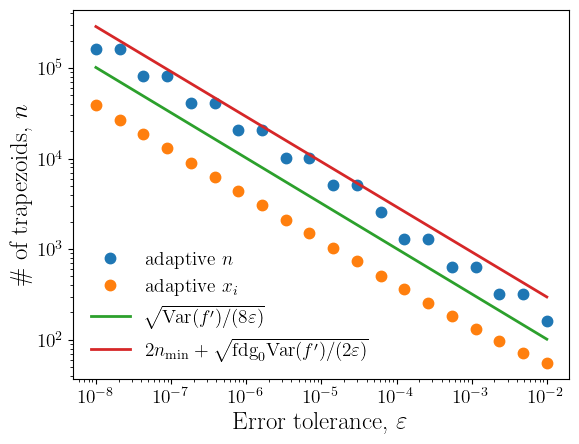

In [26]:
out_filename = f'adapt_Trap_tol_min_{tol_min}.pkl'
with open(figpath+out_filename,'rb') as myfile: 
    nmin,tol_min,tol_vec,adapt_n_cost,adapt_x_cost = pickle.load(myfile) #load in all the data

aspect_ratio = 1
fig, ax = plt.subplots()
ax.plot(tol_vec,adapt_n_cost, '.', markersize = 15, label = "adaptive $n$")
ax.plot(tol_vec,adapt_x_cost, '.', markersize = 15, label = "adaptive $x_i$")
ax.plot([tol_vec[0], tol_vec[-1]],np.sqrt(varfpeakp/(8*(np.array([tol_vec[0], tol_vec[-1]])))), '-', linewidth = 2, label = "$\\sqrt{\\mathrm{Var}(f')/(8\\varepsilon)}$")
ax.plot([tol_vec[0], tol_vec[-1]],2*nmin+np.sqrt(fdg_0*varfpeakp/(2*(np.array([tol_vec[0], tol_vec[-1]])))), '-', linewidth = 2, \
        label = "$2n_{\\min} + \\sqrt{\mathrm{fdg}_0\\mathrm{Var}(f')/(2\\varepsilon)}$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Error tolerance, $\\varepsilon$")
ax.set_ylabel("\# of trapezoids, $n$")
ax.legend(frameon = False, loc="lower left", fontsize=14, )

fig.savefig(figpath+f"fpeak_cost_trapezoidal_rule_n_{n}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

## Examples of ways to spread points on a hypercube

### Evenly spaced points in one dimension $(d=1)$
In one dimension it is easy to spread points evenly

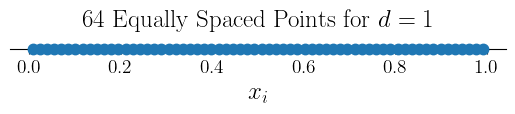

In [27]:
n = 64
xpts = np.linspace(1/(2*n), 1-1/(2*n), n) #equally spaced points between 0 and 1
fig, ax = plt.subplots()
ax.plot(xpts, np.zeros_like(xpts), **blue_symbol, zorder=10, clip_on=False) 
ax.set_ylim([0, 3e-2])
ax.set_title(f"{n:.0f} Equally Spaced Points for $d=1$")
ax.set_xlabel("$x_i$")
ax.set_aspect(1)
ax.axes.get_yaxis().set_visible(False)  #turn off the tics on the vertical axis
ax.spines[['top','right','left']].set_visible(False)  #turn off the bounding box on the top and sides
if savefigs:
    fig.savefig(figpath+f"{n:.0f}equallyspacedpts."+imgfrmt,format=imgfrmt)

In [28]:
def make_grid(d=3,nper=2):  #this function creates a nper^d x d matrix of grid points
    xpts = np.linspace(1/(2*nper), 1.0-1/(2*nper), nper)  #array of coordinate values
    xgrid = xpts  #initial grid
    n = nper  #initial length of grid
    for ii in range(1,d):
        xgrid0 = xgrid  #store the old grid
        xgrid = np.vstack((xgrid0,xpts[0]*np.ones((1,n))))  #stack the next coordinate
        for jj in range(1,nper):
            xgrid = np.hstack((xgrid,np.vstack((xgrid0,xpts[jj]*np.ones((1,n))))))
        n = n*nper  #update the length of the grid
    return xgrid.T  #take the transpose to that coordinates are columns

plt.rcParams.update({
    "font.family" : font_family,
    "mathtext.fontset" : "dejavuserif",
    "axes.labelsize" : 18,
    "axes.titlesize" : 18,
    "xtick.labelsize" : 14,
    "ytick.labelsize" : 14
})
def plot_grid(xgrid, coord_to_plot = [0, 1], savefig = True, figpath = ''):
    n = xgrid.shape[0]
    d = xgrid.shape[1]
    coord_to_plot = np.minimum(coord_to_plot,[d,d]), #ensure that they are no more than d
    coord_to_plot = coord_to_plot[0]
    coord_to_plot = np.maximum(coord_to_plot,[1,1]), #ensure that they are no less than 1
    coord_to_plot = coord_to_plot[0]
    fig, ax = plt.subplots(figsize=(4.5,4.5))
    ax.plot(xgrid[:,coord_to_plot[0]-1], xgrid[:,coord_to_plot[1]-1], **blue_symbol, zorder=10, clip_on=False) 
    ax.set_title(f"{n:.0f} Grid Points for $d = ${d:.0f}",fontsize=24)
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])
    ax.set_xlabel(r'$x_{i%d}$'%(coord_to_plot[0]),fontsize=20)#,fontname="dejavuserif",font_familiy="serif")
    ax.set_ylabel(r'$x_{i%d}$'%(coord_to_plot[1]),fontsize=20)#,fontname="dejavuserif")
    ax.set_aspect(1)
    ax.grid(False)
    if savefigs:
        fig.savefig(figpath+f"{n:.0f}gridpts_d{d:.0f}."+imgfrmt,format=imgfrmt, bbox_inches='tight')


### Grids in dimension $d$
Our natural thought for higher dimensions is to use rectangular grids, but as the dimension, $d$, increases, the number of different values per coordinate decreases drastically.

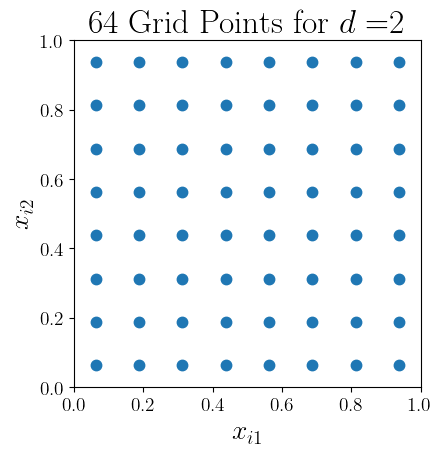

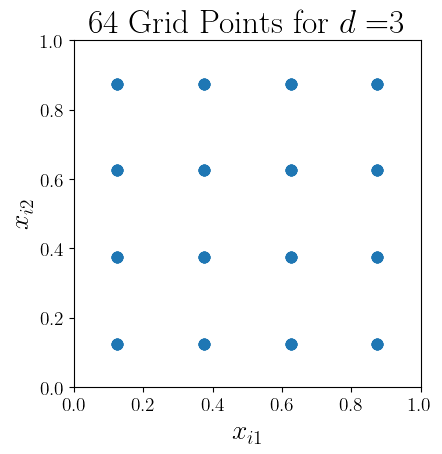

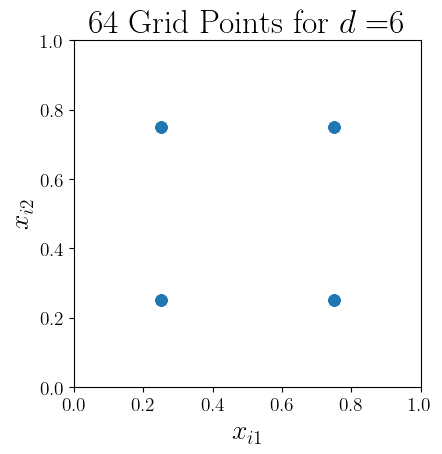

In [29]:
plot_grid(make_grid(2,8), [1,2], savefigs, figpath)
plot_grid(make_grid(3,4), [1,2], savefigs, figpath)
plot_grid(make_grid(6,2), [1,2], savefigs, figpath)

### Independent and identically distributed (IID) points
Since grids are bad, we can use IID points instead.  Note how they fill space better.

In [30]:
#Parameter values used here and below
d = 6  #the dimension used for these examples
n = 64  #the sample size used for these examples
dot_size = 20  #size of dot in some plots
line_width = 2.5

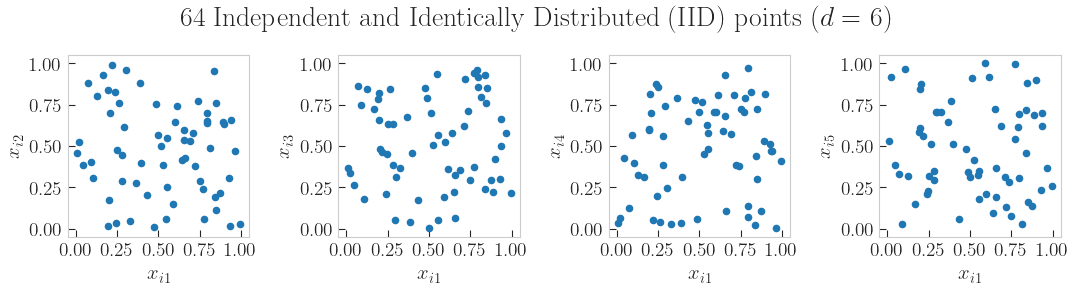

In [32]:
plot_proj_args = {"figfac" : 11,
                  "axis_pad" : 0.05,
                  "marker_size" : dot_size,
                  "font_family" : font_family,
                  "want_grid" : False,
                  "where_title" : 0.527}
fig,ax = qp.plot_proj(qp.IIDStdUniform(d), n, d_horizontal = 1, d_vertical = np.arange(2,6), **plot_proj_args, \
                      fig_title = f"{n} Independent and Identically Distributed (IID) points ($d = $ {d})")
fig.tight_layout()
if savefigs:
        fig.savefig(figpath+f"{n:.0f}iidpts_d{d:.0f}."+imgfrmt,format=imgfrmt, bbox_inches='tight')

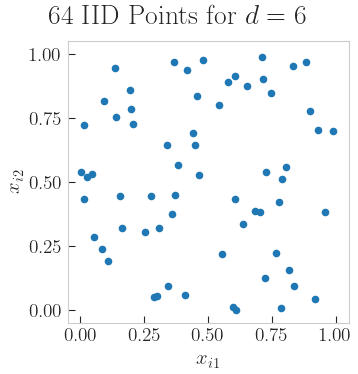

In [33]:
plot_proj_args = {"figfac" : 4,
                  "axis_pad" : 0.05,
                  "marker_size" : dot_size,
                  "font_family" : font_family,
                  "want_grid" : False,
                  "where_title" : 0.94}
fig,ax = qp.plot_proj(qp.IIDStdUniform(d), n, d_horizontal = 1, d_vertical = 2, **plot_proj_args, \
                      fig_title = f"{n} IID Points for $d = {d}$")
fig.tight_layout()
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_one_plot_iidpts_d{d:.0f}."+imgfrmt,format=imgfrmt, bbox_inches='tight')

### Low disrepancy points
There are several kinds of low discrepancy points, includng Sobol', lattice, and Halton.  Below we display one kind.

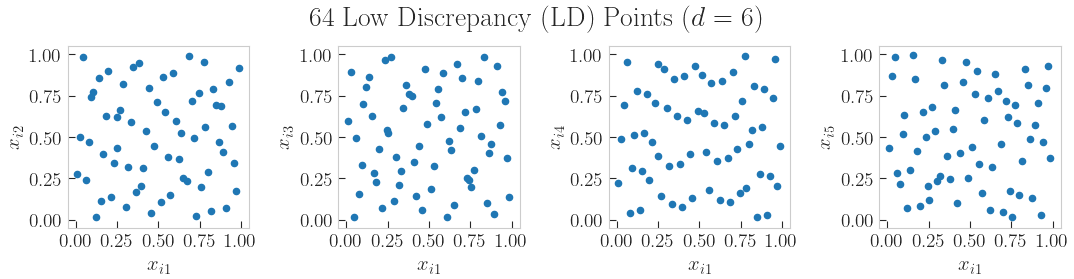

In [34]:
plot_proj_args = {"figfac" : 11,
                  "axis_pad" : 0.05,
                  "marker_size" : dot_size,
                  "font_family" : font_family,
                  "want_grid" : False,
                  "where_title" : 0.525}
fig,ax = qp.plot_proj(qp.Sobol(d), n, d_horizontal = 1, d_vertical = np.arange(2,6), **plot_proj_args, \
                      fig_title = f"{n} Low Discrepancy (LD) Points ($d = $ {d})")
    #d_horizontal and d_vertical are the tuples of coordinates to plot
fig.tight_layout()
if savefigs:
        fig.savefig(figpath+f"{n:.0f}sobolpts_d{d:.0f}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

### Integration Lattices

#### Constructing an integration lattice
$$
\vx_i = i \vh / n \ \pmod{1}, \qquad i = 0, \ldots, n-1
$$

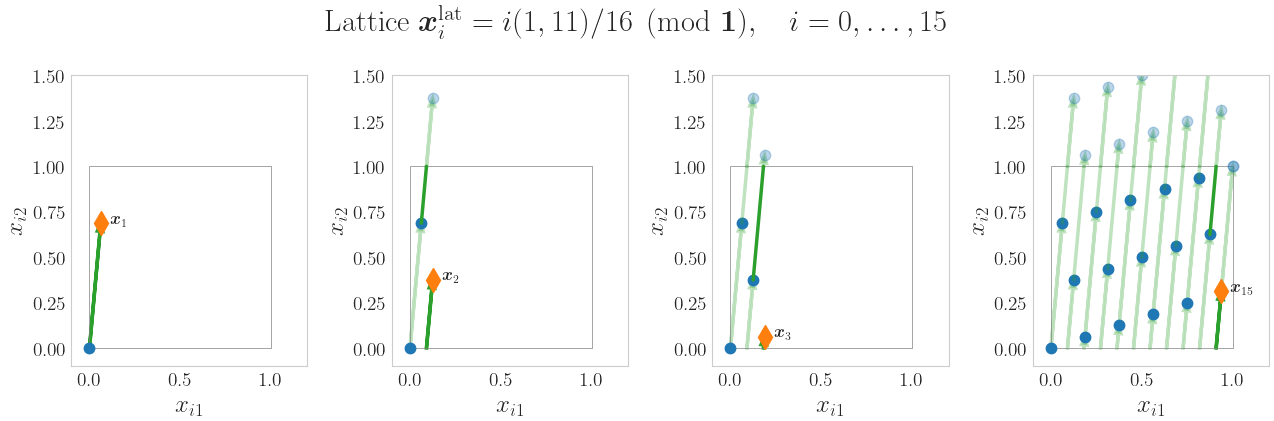

In [35]:
h_gen = np.array([1, 11])
n = 16
d = h_gen.size
x_lat = np.mod(np.arange(0,n).reshape(n,1)*h_gen.reshape(1,d)/n,1)
#x_lat = qp.Lattice(d,randomize = False).gen_samples(n)

al_fade = 0.3
x_off = 0.05
an_ft = 15
arrow_style = {"color" : py_green, "head_width" : 0.03, "length_includes_head" : True, "linewidth" : line_width}
n_plt = 4
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
for ii in range(n_plt):
    ax[ii].set_xlim([-0.1, 1.2])
    ax[ii].set_ylim([-0.1, 1.5])
    ax[ii].set_aspect(1) 
    ax[ii].grid(False)
    ax[ii].plot([0,0,1,1,0],[0,1,1,0,0], linewidth = 0.5, color = "gray")
    ax[ii].set_xlabel("$x_{i1}$")
    ax[ii].set_ylabel("$x_{i2}$")

    
ax[0].plot(x_lat[0,0],x_lat[0,1], **blue_symbol)
ax[0].plot(x_lat[1,0],x_lat[1,1], **orange_symbol)
ax[0].arrow(x_lat[0,0],x_lat[0,1],h_gen[0]/n,h_gen[1]/n,**arrow_style)
ax[0].annotate(f"$\\boldsymbol{{x}}_1$",(x_lat[1,0]+x_off,x_lat[1,1]))


for jj in range(1,4):  #next three plots
    over_ctr = 0  #how many times higher than one
    ax[jj].plot(x_lat[0,0],x_lat[0,1],**blue_symbol) #plot the origin
    x_next_vert = x_lat[0,1]+h_gen[1]/n  #how high the next point may go
    kk = 1  #next is the first point
    cond = (over_ctr < jj)  or ((jj == 3) & (kk < n))
    #print("jj = ",jj,"kk = ",kk,"cond =",cond)
    while cond :
        while x_next_vert < 1:  #as long as the next point does not go to high
            ax[jj].plot(x_lat[kk,0],x_lat[kk,1],**blue_symbol)  #plot next point
            ax[jj].arrow(x_lat[kk-1,0],x_lat[kk-1,1],h_gen[0]/n,h_gen[1]/n,alpha = al_fade,**arrow_style)  #plot arrow to nexgt point
            x_next_vert = x_lat[kk,1]+h_gen[1]/n  #how high does the next point go
            kk += 1  #increment next point
        over_ctr +=1  #this next point will go over the vertical axis
        #print("over_ctr =",over_ctr)
        cond = (over_ctr < jj)  or ((jj == 3) & (kk < n-1)) #is this the last jump or the last figure
        #print("jj = ",jj,"kk = ",kk,"n =",n,"cond =",cond)
        xcross = x_lat[kk-1,0]+(1.-x_lat[kk-1,1])*h_gen[0]/h_gen[1]  #determine the crosssing point 
        if cond:  #if not over more than allowed number of times 
            ax[jj].plot([x_lat[kk-1,0],xcross],[x_lat[kk-1,1],1],'-',color = py_green, alpha = al_fade, linewidth = line_width)  #plot the bottom part of the arrow
            ax[jj].arrow(xcross,1,x_lat[kk,0]-xcross,x_lat[kk,1],alpha = al_fade,**arrow_style)  #plot the top part of the arrow
            ax[jj].arrow(xcross,0,x_lat[kk,0]-xcross,x_lat[kk,1],alpha = al_fade,**arrow_style)  #plot the top part of the wrapped around arrow
            ax[jj].plot(x_lat[kk,0],x_lat[kk,1],**blue_symbol)  #plot the new point
        else:
            #print("jj = ",jj,"kk = ",kk,"n =",n,"cond =",cond)
            ax[jj].plot([x_lat[kk-1,0],xcross],[x_lat[kk-1,1],1],'-',color = py_green,linewidth = line_width)
            ax[jj].arrow(xcross,1,x_lat[kk,0]-xcross,x_lat[kk,1],alpha = al_fade,**arrow_style)
            ax[jj].arrow(xcross,0,x_lat[kk,0]-xcross,x_lat[kk,1],**arrow_style)
            ax[jj].annotate(f"$\\boldsymbol{{x}}_{{{kk}}}$",(x_lat[kk,0]+x_off,x_lat[kk,1]))
            ax[jj].plot(x_lat[kk,0],x_lat[kk,1],**orange_symbol)  #plot the new point
        ax[jj].plot(x_lat[kk,0],1 + x_lat[kk,1],**blue_symbol, alpha = al_fade)  #plot the new point before wrap around
        x_next_vert = x_lat[kk,1]+h_gen[1]/n
        kk += 1
        cond = (over_ctr < jj)  or ((jj == 3) & (kk < n))
        #print("jj = ",jj,"kk = ",kk,"n =",n,"cond =",cond)

ax[3].plot(1.,1. , **blue_symbol, alpha = al_fade)
ax[3].plot(1.,1. , **blue_symbol, alpha = al_fade)
ax[3].arrow(x_lat[-1,0],x_lat[-1,1],h_gen[0]/n,h_gen[1]/n,alpha = al_fade,**arrow_style)
        
fig.suptitle(f"Lattice $\\boldsymbol{{x}}^{{\mathrm{{lat}}}}_i = i ({h_gen[0]},{h_gen[1]})/{n} \\pmod{{\\boldsymbol{{1}}}}, \\quad i = 0, \\ldots, {n-1}$", \
             ha = 'center', va = 'center', y = .92, fontsize=22)
fig.tight_layout()
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_lattice_construct_d{d:.0f}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

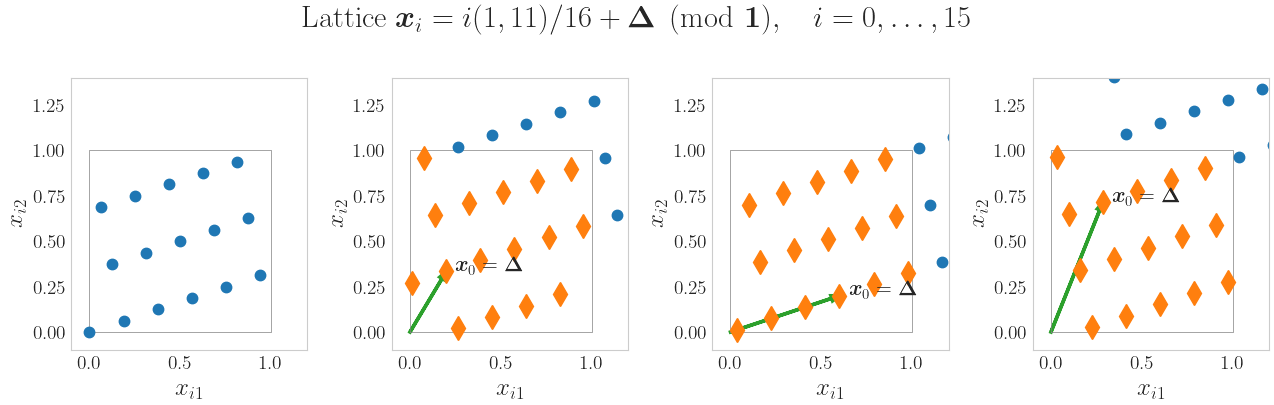

In [36]:
x_lat = x_lat[:,0:2]
n_plt = 4
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
for ii in range(n_plt):
    ax[ii].set_xlim([-0.1, 1.2])
    ax[ii].set_ylim([-0.1, 1.4])
    ax[ii].set_aspect(1) 
    ax[ii].grid(False)
    ax[ii].plot([0,0,1,1,0],[0,1,1,0,0], linewidth = 0.5, color = "gray")
    ax[ii].set_xlabel("$x_{i1}$")
    ax[ii].set_ylabel("$x_{i2}$")

shift = np.array([[1/5,1/3],[3/5,1/5],[2/7,5/7]])
    
ax[0].plot(x_lat[:,0],x_lat[:,1],**blue_symbol)

for ii in range(1,4):
    x_shlat = x_lat + shift[ii-1,:]
    x_shlatmod = np.mod(x_shlat,1)
    ax[ii].plot(x_shlat[:,0],x_shlat[:,1],**blue_symbol)
    ax[ii].plot(x_shlatmod[:,0],x_shlatmod[:,1],**orange_symbol)
    ax[ii].arrow(0,0,x_shlat[0,0],x_shlat[0,1],**arrow_style)
    ax[ii].annotate(f"$\\boldsymbol{{x}}_{{0}} = \\boldsymbol{{\\Delta}}$",(x_shlat[0,0]+x_off,x_shlat[0,1]), fontsize = an_ft)

fig.suptitle(f"Lattice $\\boldsymbol{{x}}_i = i ({h_gen[0]},{h_gen[1]})/{n} + \\boldsymbol{{\\Delta}} \\pmod{{\\boldsymbol{{1}}}}, \\quad i = 0, \\ldots, {n-1}$", \
             ha = 'center', va = 'center', fontsize = 22, y=0.90)
fig.tight_layout()
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_shifted_lattice_construct_d{d:.0f}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

#### Constructing a __shifted__ integration lattice
$$
\vx_i = i \vh / n + \boldsymbol{\Delta} \ \pmod{1}, \qquad i = 0, \ldots, n-1
$$

#### van der Corput sequence, an extensible 1-D even sequence

/Users/alegresor/Desktop/QMCSoftware/qmcpy/discrete_distribution/digital_net_b2/digital_net_b2.py:385


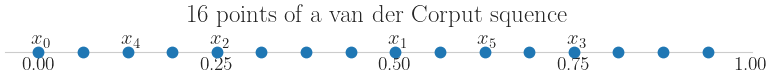

In [37]:
n = 16
xoff = -0.01
yoff = 0.01
xpts = qp.Sobol(1,randomize =  False).gen_samples(n) #equally spaced points between 0 and 1
fig, ax = plt.subplots()
ax.plot(xpts, np.zeros_like(xpts), zorder=10, clip_on=False, **blue_symbol)
ax.set_ylim([0, 3e-2])
ax.set_title(f"{n:.0f} points of a van der Corput squence")
#ax.set_xlabel("$x_i$")
ax.set_aspect(1)
ax.axes.get_yaxis().set_visible(False)  #turn off the tics on the vertical axis
ax.grid(False)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.spines[['top','right','left']].set_visible(False)  #turn off the bounding box on the top and sides
for ii in range(6):
    ax.annotate(f"$x_{{{ii}}}$",(xpts[ii] + xoff, yoff), fontsize = an_ft)
if savefigs:
    fig.savefig(figpath+f"{n:.0f}vandercorputpts."+imgfrmt,format=imgfrmt)


#### Constructing an __extensible__ integration lattice
$$
\vx_i = i \vh / n \ \pmod{1}, \qquad i = 0, \ldots, n-1
$$

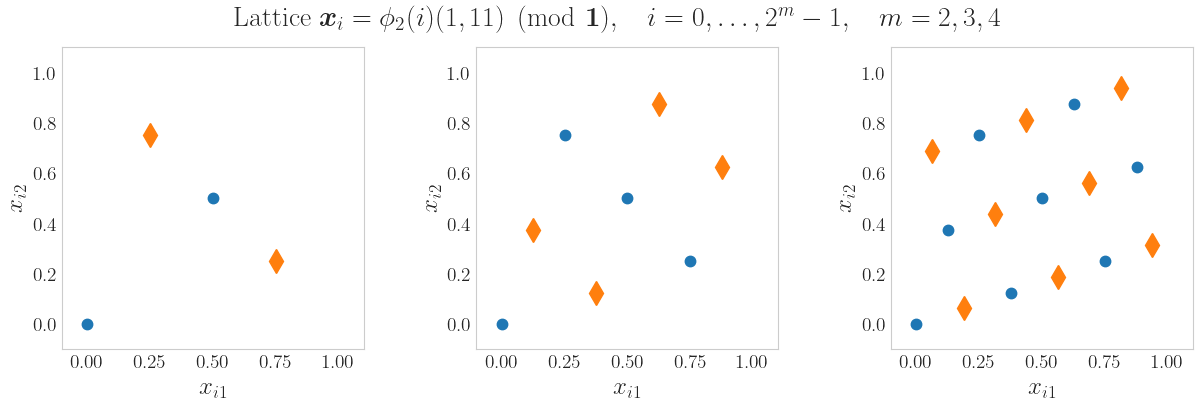

In [38]:
m = 4
n =  2**m
#h_gen = np.array([1,11])
vdc = qp.Sobol(1,randomize =  False).gen_samples(n) #equally spaced points between 0 and 1
x_lat = np.mod(vdc*h_gen,1)
#print(x_lat)
n_plt = 3
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))

for ii in range(n_plt):
    jj = ii+m-n_plt
    ax[ii].set_xlim([-0.1, 1.1])
    ax[ii].set_ylim([-0.1, 1.1])
    ax[ii].set_aspect(1) 
    ax[ii].grid(False)
    ax[ii].set_xlabel("$x_{i1}$")
    ax[ii].set_ylabel("$x_{i2}$")
    nstart = 0
    ax[ii].plot(x_lat[0:2**jj,0],x_lat[0:2**jj,1],**blue_symbol)
    ax[ii].plot(x_lat[2**jj:2**(jj+1),0],x_lat[2**jj:2**(jj+1),1],**orange_symbol)

fig.suptitle(f"Lattice $\\boldsymbol{{x}}_i = \\phi_2(i) ({h_gen[0]},{h_gen[1]}) \\pmod{{\\boldsymbol{1}}}, \\quad i = 0, \\ldots, 2^m - 1, \\quad m = 2, 3, 4$", \
             ha = 'center', va = 'center', fontsize = 20, y = 0.92)
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_extensible_lattice_construct_d{d:.0f}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

#### Constructing an __extensible__ and __shifted__ integration lattice
$$
\vx_i = i \vh / n + \boldsymbol{\Delta} \ \pmod{1}, \qquad i = 0, \ldots, n-1
$$

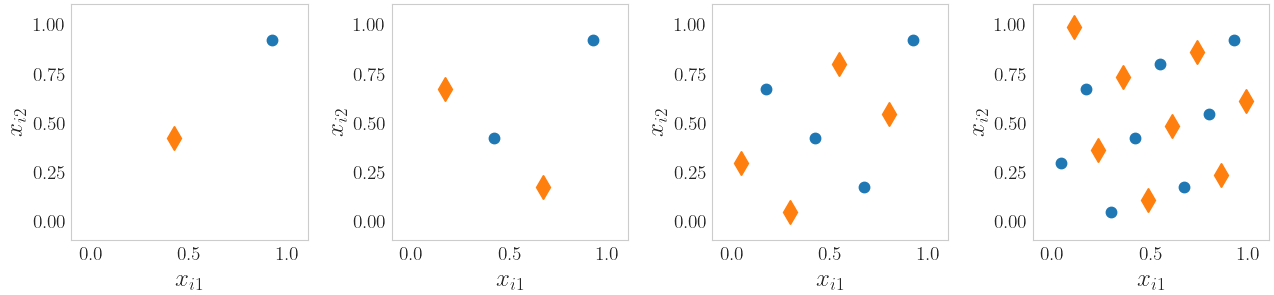

In [39]:
n =  16
x_lat = qp.Lattice(2, seed = 47).gen_samples(n)
n_plt = 4
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))

for ii in range(n_plt):
    ax[ii].set_xlim([-0.1, 1.1])
    ax[ii].set_ylim([-0.1, 1.1])
    ax[ii].set_aspect(1) 
    ax[ii].grid(False)
    ax[ii].set_xlabel("$x_{i1}$")
    ax[ii].set_ylabel("$x_{i2}$")
    nstart = 0
    ax[ii].plot(x_lat[0:2**ii,0],x_lat[0:2**ii,1],**blue_symbol)
    ax[ii].plot(x_lat[2**ii:2**(ii+1),0],x_lat[2**ii:2**(ii+1),1],**orange_symbol)

#fig.text(0.55,0.95,f"Lattice $\\boldsymbol{{x}}_i = i ({h_gen[0]},{h_gen[1]})/{n} + \\boldsymbol{{\\Delta}} \\pmod{{1}}, \\quad i = 0, \\ldots, {n-1}$", ha = 'center', va = 'center', fontsize = 20)
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_extensible_shifted_lattice_construct_d{d:.0f}."+imgfrmt,format=imgfrmt)

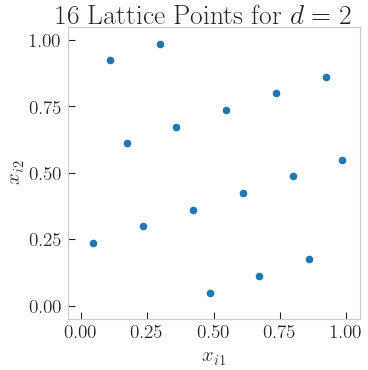

In [40]:
plot_proj_args = {"figfac" : 4,
                  "axis_pad" : 0.05,
                  "marker_size" : dot_size,
                  "font_family" : font_family,
                  "want_grid" : False,
                  "where_title" : 0.94}
fig,ax = qp.plot_proj(qp.Lattice(d), n, d_horizontal = 1, d_vertical = 2, **plot_proj_args, \
                      fig_title = f"{n} Lattice Points for $d = {d}$")
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_one_plot_latticepts_d{d:.0f}."+imgfrmt,format=imgfrmt, bbox_inches='tight')

### Digital sequences

#### Digital sequences cover tiles

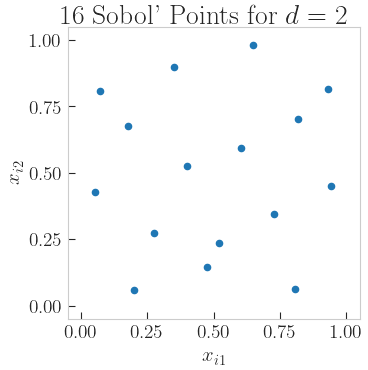

In [41]:
plot_proj_args = {"figfac" : 4,
                  "axis_pad" : 0.05,
                  "marker_size" : dot_size,
                  "font_family" : font_family,
                  "want_grid" : False,
                  "where_title" : 0.94}
fig,ax = qp.plot_proj(qp.Sobol(d), n, d_horizontal = 1, d_vertical = 2, **plot_proj_args, \
                      fig_title = f"{n} Sobol' Points for $d = {d}$")
if savefigs:
        fig.savefig(figpath+f"{n:.0f}_one_plot_sobolpts_d{d:.0f}."+imgfrmt,format=imgfrmt, bbox_inches='tight')

/Users/alegresor/Desktop/QMCSoftware/qmcpy/discrete_distribution/digital_net_b2/digital_net_b2.py:385


[[0.    0.    0.   ]
 [0.5   0.5   0.5  ]
 [0.25  0.75  0.75 ]
 [0.75  0.25  0.25 ]
 [0.125 0.625 0.375]
 [0.625 0.125 0.875]
 [0.375 0.375 0.625]
 [0.875 0.875 0.125]]
2


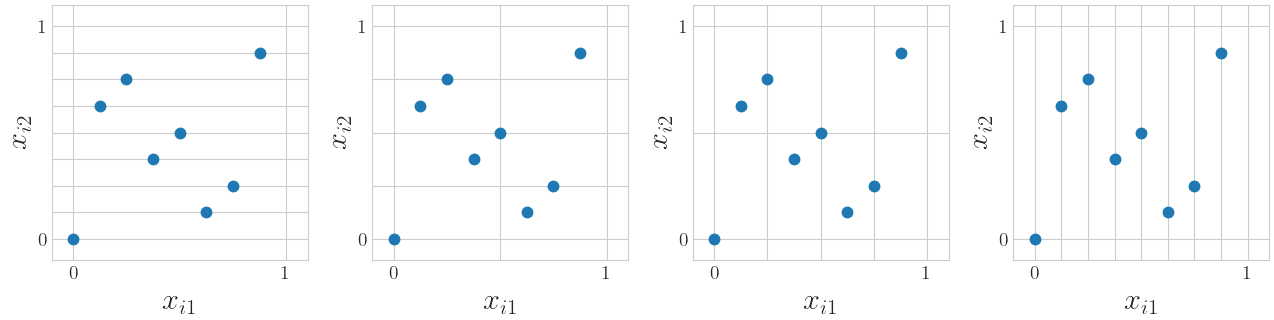

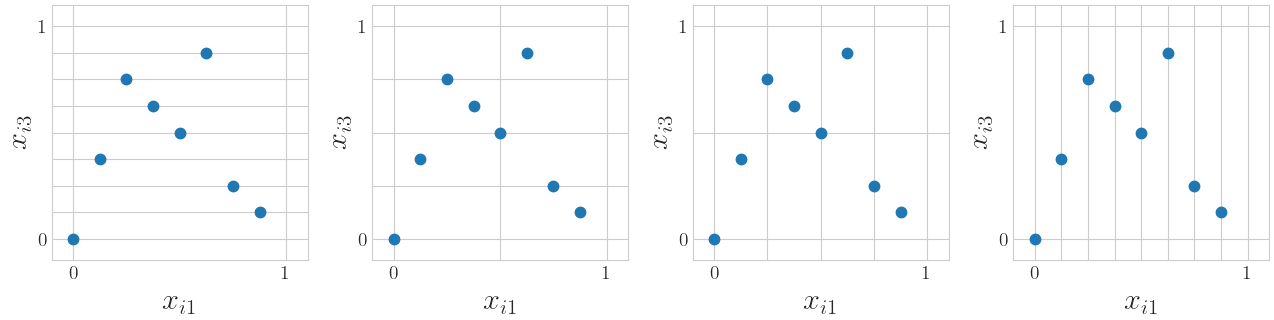

In [42]:
n_plt = 4
n = 2**(n_plt-1)
d = 3
x_sob = qp.Sobol(d, randomize = False).gen_samples(n)
print(x_sob)


coord = np.array([[0,1],[0,2]])
print(coord.shape[0])

for iii in range(coord.shape[0]):
    fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
    for ii in range(n_plt):
        ax[ii].set_xlim([-0.1, 1.1])
        ax[ii].set_ylim([-0.1, 1.1])
        xticklabels = [0]
        for jj in range(2**ii-1):
            xticklabels.append("")
        xticklabels.append(1)
        ax[ii].set_xticks(np.linspace(0,1,2**ii+1),xticklabels)
        yticklabels = [0]
        for jj in range(2**(n_plt-ii-1)-1):
            yticklabels.append("")
        yticklabels.append(1)
        ax[ii].set_yticks(np.linspace(0,1,2**(n_plt-ii-1)+1),yticklabels)
        ax[ii].set_aspect(1) 
        ax[ii].set_xlabel(f"$x_{{i{coord[iii,0]+1}}}$",fontsize = 22)
        ax[ii].set_ylabel(f"$x_{{i{coord[iii,1]+1}}}$",fontsize = 22)
        #ax[ii].grid(False)
        ax[ii].plot(x_sob[:,coord[iii,0]],x_sob[:,coord[iii,1]],**blue_symbol)
    
    #fig.text(0.55,0.95,f"Sobol $\\boldsymbol{{x}}_i = i ({h_gen[0]},{h_gen[1]})/{n} + \\boldsymbol{{\\Delta}} \\pmod{{1}}, \\quad i = 0, \\ldots, {n-1}$", ha = 'center', va = 'center', fontsize = 20)
    if savefigs:
        fig.savefig(figpath+f"{n:.0f}_sobol_sequence_elementary_intervals_d{d:.0f}_coord_({coord[iii,0]+1},{coord[iii,1]+1})."+imgfrmt,format=imgfrmt)

#### __Randomly Shifted__ digital sequences still cover tiles

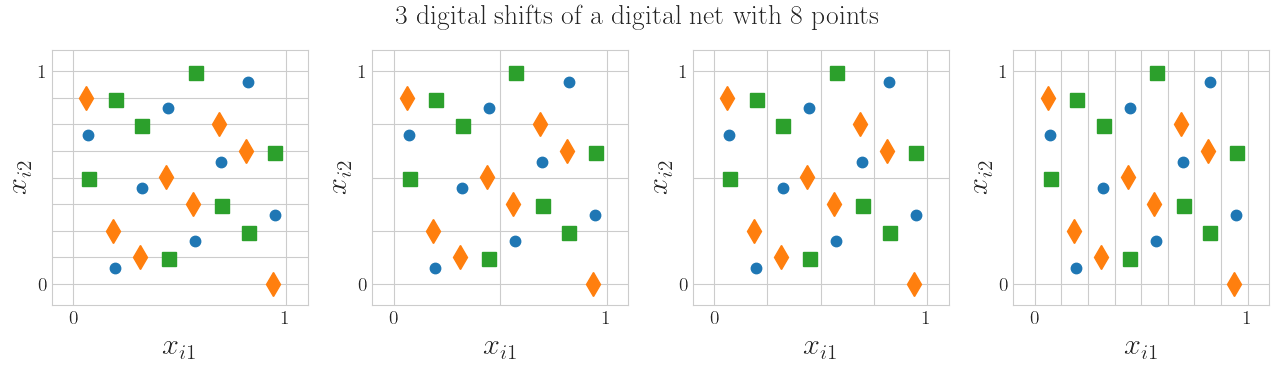

In [43]:
n_plt = 4
d = 2
n = 2**(n_plt-1)
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
n_scr = 3
for kk in range(n_scr):
    x_sob = qp.Sobol(d, randomize = "DS").gen_samples(n)  #just a digital shift applied
    for ii in range(n_plt):
        if kk == 0:
            ax[ii].set_xlim([-0.1, 1.1])
            ax[ii].set_ylim([-0.1, 1.1])
            ax[ii].set_xlabel("$x_{i1}$",fontsize=22)
            ax[ii].set_ylabel("$x_{i2}$",fontsize=22)
            xticklabels = [0]
            for jj in range(2**ii-1):
                xticklabels.append("")
            xticklabels.append(1)
            ax[ii].set_xticks(np.linspace(0,1,2**ii+1),xticklabels)
            yticklabels = [0]
            for jj in range(2**(n_plt-ii-1)-1):
                yticklabels.append("")
            yticklabels.append(1)
            ax[ii].set_yticks(np.linspace(0,1,2**(n_plt-ii-1)+1),yticklabels)
            ax[ii].set_aspect(1) 
            #ax[ii].grid(False)
        ax[ii].plot(x_sob[:,0],x_sob[:,1],**symbol_args[kk])

fig.suptitle(f"{n_scr} digital shifts of a digital net with {n} points", ha = 'center', va = 'center', fontsize = 20, y=0.83)
if savefigs:
        fig.savefig(figpath+f"n_{n:}_n_sh_{n_scr}_shifted_sobol_sequence_d{d}."+imgfrmt,format=imgfrmt)

#### __Randomly Scrambled__ digital sequences still cover tiles

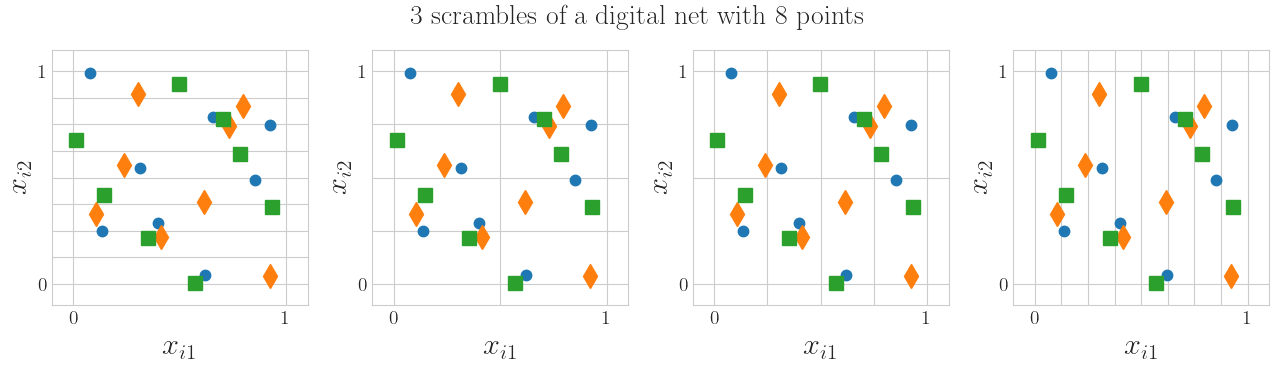

In [44]:
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
n_scr = 3
for kk in range(n_scr):
    x_sob = qp.Sobol(d).gen_samples(n)
    for ii in range(n_plt):
        if kk == 0:
            ax[ii].set_xlim([-0.1, 1.1])
            ax[ii].set_ylim([-0.1, 1.1])
            ax[ii].set_xlabel("$x_{i1}$",fontsize=22)
            ax[ii].set_ylabel("$x_{i2}$",fontsize=22)
            xticklabels = [0]
            for jj in range(2**ii-1):
                xticklabels.append("")
            xticklabels.append(1)
            ax[ii].set_xticks(np.linspace(0,1,2**ii+1),xticklabels)
            yticklabels = [0]
            for jj in range(2**(n_plt-ii-1)-1):
                yticklabels.append("")
            yticklabels.append(1)
            ax[ii].set_yticks(np.linspace(0,1,2**(n_plt-ii-1)+1),yticklabels)
            ax[ii].set_aspect(1) 
            #ax[ii].grid(False)
        ax[ii].plot(x_sob[:,0],x_sob[:,1],**symbol_args[kk])

fig.suptitle(f"{n_scr} scrambles of a digital net with {n} points", ha = 'center', va = 'center', fontsize = 20, y = 0.83)
if savefigs:
        fig.savefig(figpath+f"n_{n:}_n_scr_{n_scr}_scrambled_sobol_sequence_d{d}."+imgfrmt,format=imgfrmt)

#### Digital nets are extensbile

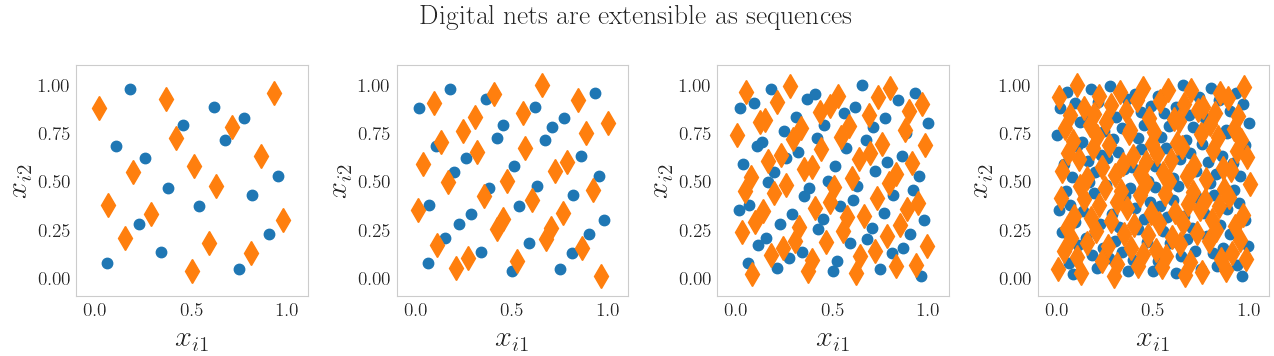

In [45]:
d = 2
n_list = np.array([16, 32, 64, 128, 256])
n_plt = len(n_list)-1
x_sob = qp.Sobol(2, seed = 29).gen_samples(n_list[-1])
               
fig, ax = plt.subplots(1,n_plt,figsize = (13,13/3))
n_scr = 3
for ii, nn in enumerate(n_list[:n_plt]):
    ax[ii].set_xlim([-0.1, 1.1])
    ax[ii].set_ylim([-0.1, 1.1])
    ax[ii].plot(x_sob[:n_list[ii],0],x_sob[:n_list[ii],1], **blue_symbol)
    ax[ii].plot(x_sob[n_list[ii]:n_list[ii+1],0],x_sob[n_list[ii]:n_list[ii+1],1], **orange_symbol)
    ax[ii].set_aspect(1) 
    ax[ii].grid(False)
    ax[ii].set_xlabel("$x_{i1}$",fontsize=22)
    ax[ii].set_ylabel("$x_{i2}$",fontsize=22)


fig.suptitle(f"Digital nets are extensible as sequences", ha = 'center', va = 'center', fontsize = 20, y = 0.83)
if savefigs:
        fig.savefig(figpath+f"extensible_scrambled_sobol_sequence_d{d:.0f}."+imgfrmt,format=imgfrmt)

### Halton sequences

/Users/alegresor/Desktop/QMCSoftware/qmcpy/discrete_distribution/halton.py:227


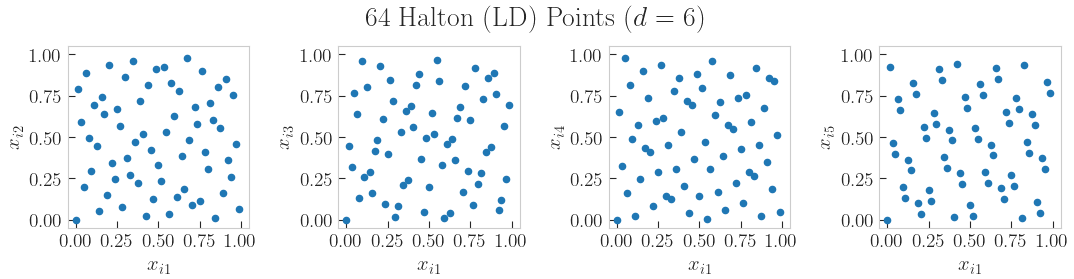

In [46]:
plot_proj_args = {"figfac" : 11,
                  "axis_pad" : 0.05,
                  "marker_size" : dot_size,
                  "font_family" : font_family,
                  "want_grid" : False,
                  "where_title" : 0.525}
n = 64
d = 6
fig,ax = qp.plot_proj(qp.Halton(d, randomize = False), n, d_horizontal = 1, d_vertical = np.arange(2,6), \
                      **plot_proj_args, fig_title = f"{n} Halton (LD) Points ($d = $ {d})")
    #d_horizontal and d_vertical are the tuples of coordinates to plot
fig.tight_layout()
if savefigs:
        fig.savefig(figpath+f"{n:.0f}Halton_pts_d{d:.0f}."+imgfrmt,format=imgfrmt,bbox_inches='tight')

## Keister illustrative example

Consider the integral 
$$
	I = \int_{\mathbb{R}^d} \cos(\lVert \boldsymbol{t} \rVert) \exp(-\lVert \boldsymbol{t} \rVert^2) \, \mathrm{d} \boldsymbol{t},
$$
where $\lVert  \boldsymbol{t} \rVert := \sqrt{t_1^2 + \cdots + t_d^2}$.  This may be thought of as the expectation of $Y := g(\boldsymbol{T}) := \pi^{d/2} \cos(\lVert \boldsymbol{T} \rVert)$, where $T_1, \ldots, T_d$ are IID Gaussian random variables with zero mean and variance $1/2$, i.e., $\boldsymbol{T} \sim \mathcal{N}(\boldsymbol{0},\mathsf{I}/2)$:
$$
	I = \int_{\mathbb{R}^d} \underbrace{\pi^{d/2} \cos(\lVert  \boldsymbol{t} \rVert)}_{=:g( \boldsymbol{t})} \cdot \underbrace{\frac{\exp(-\lVert  \boldsymbol{t} \rVert^2)}{\pi^{d/2}}}_{\text{density of } \mathcal{N}(\boldsymbol{0},\mathsf{I}/2)} \, \mathrm{d} \boldsymbol{t}  = \mathbb{E}(Y) = \mathbb{E}(Y)[g(T)].
$$

We perform a variable transformation $\boldsymbol{t}  = \sqrt{2}(\Phi^{-1}(x_1), \ldots, \Phi^{-1}(x_d))$, where is $\Phi$ is the cumulative distribution function of the standard Gaussian random variable.  This reimagines the integral $I$ as the expectation of a function, $f$, of a standard uniform random variable:
$$
\begin{aligned}
	I &= \int_{[0,1]^d} \underbrace{\pi^{d/2} \cos\Bigl (\sqrt{2} \bigl \lVert \bigl( \Phi^{-1}(x_1), \ldots, \Phi^{-1}(x_d)\bigr) \bigr\rVert \Bigr)}_{=:f(\boldsymbol{x})} \, \mathrm{d} \boldsymbol{x} \\
	&= \mathbb{E}(Y) 
	= \mathbb{E}[f(\boldsymbol{X})], \qquad \boldsymbol{X} \sim \mathcal{U}[0,1]^d.
\end{aligned}
$$

### Calculate approximations to this integral using grid sampling, simple Monte Carlo, and quasi-Monte Carlo

In [47]:
d = 6  #the dimension we will try
keister_net = qp.Keister(qp.DigitalNetB2(d))  #use the built-in Keister function
true_value = keister_net.exact_integ(d) #the true value can be calculated as a one-dimensional integral
print("For d =",d,", the value of the integral =",true_value)


For d = 6 , the value of the integral = -2.327303729297949


In [48]:
#Parameters for the calculations below
m_max = 24  #log_2 of the maximum number of samples
n_rep = 51  #number of replications for (q)MC
n_max = 2**m_max  #maximum number of samples
nn_mc = 50  #number of different MC sample sizes
n_grid = (np.arange(1,np.ceil(n_max**(1./d))+1)**d).astype(int)  #vector of grid sample sizes
n_mc = np.floor(2**np.linspace(0,m_max,nn_mc)).astype(int)  #vector of MC sample sizes
n_qmc = 2**np.arange(0,m_max+1,dtype = int)  #vector of qMC sample sizes


In [49]:
print(n_max,n_grid[-1],n_max**(1/6), 15**6, 16**6)

16777216 16777216 15.999999999999998 11390625 16777216


### Skip this time-consuming block if the Keister computations have already been done

In [50]:
if long_compute:
    #function to compute the relative error of the Keister example for a node set x
    def keister_err(x,n_val):
        y = keister_net.g(sp.stats.norm.ppf(x)/np.sqrt(2))
        sample_avg = y.cumsum()[n_val-1]/n_val
        return np.abs(1 - sample_avg/true_value)  #relative error
    
    #compute errors for grids
    err_grid = np.zeros_like(n_grid,dtype = float)
    for ii, n in enumerate(n_grid):
        err_grid[ii] = keister_err(make_grid(d,ii+1),n) 
    #print(err_grid)
    
    #compute errors for (q)MC
    err_mc = np.zeros([len(n_mc),n_rep])
    err_qmc = np.zeros([m_max+1,n_rep])
    print("Replication")
    for jj in range(n_rep):
        print(f"{jj},", end = " ", flush = True)
        iid_pts = qp.IIDStdUniform(d).gen_samples(n_mc[-1])
        net_pts = qp.DigitalNetB2(d,t_lms=64).gen_samples(n_qmc[-1])  #because of the large number of points, we set t_lms = 64 to avoid accidental points on the boundary of the unit cube
        # Check where the values are 0 or 1
        mask = (net_pts == 0.) | (net_pts == 1.) #check for  bad points
        if np.any(mask):  #if there are any, print them
            bad_values = net_pts[mask]
            print("BAD VALUES:", bad_values)
        err_mc[:,jj] = keister_err(iid_pts,n_mc) 
        err_qmc[:,jj] = keister_err(net_pts,n_qmc) 
    err_mc_avg = err_mc.mean(1)
    err_qmc_avg = err_qmc.mean(1) 
    print("Finished")
    
    #Store the output for later plotting 
    out_filename = f'Keister_d_{d}_n_max_{n_max}_n_rep_{n_rep}.pkl'
    stored_vars  = [d,m_max,n_rep,n_max,n_grid,n_mc,n_qmc,err_grid,err_mc,err_qmc,err_mc_avg,err_qmc_avg]
    with open(figpath+out_filename,'wb') as myfile: 
        pickle.dump(stored_vars,myfile)  #save numerical output as a pickle file


### Plot the errors of the three methods

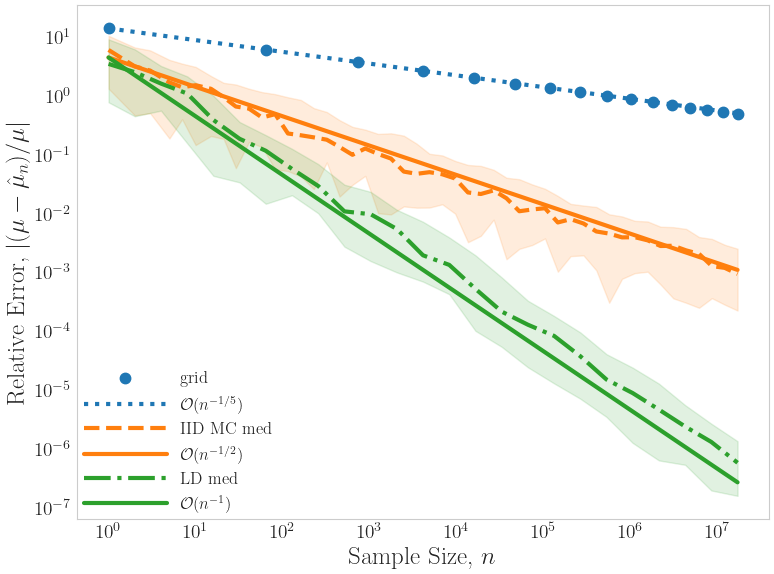

In [56]:
#Load the output for plotting
out_filename = f'Keister_d_{d}_n_max_{n_max}_n_rep_{n_rep}.pkl'
with open(figpath+out_filename,'rb') as myfile: 
    d,m_max,n_rep,n_max,n_grid,n_mc,n_qmc,err_grid,err_mc,err_qmc,err_mc_avg,err_qmc_avg = pickle.load(myfile) #load in all the data


#Plot the errors and trend lines
keister_plt_lines_args = {"linewidth" : 3,
                         "markersize" : 10}
#grid results plot
plt.loglog(n_grid, err_grid, **blue_symbol, alpha = 1, label = "grid") #grid sampling errors
plt.loglog([n_grid[0],n_grid[-1]],[err_grid[0],err_grid[0]*(n_grid[-1]/n_grid[0])**(-1./(d-1))], ':', \
           **keister_plt_lines_args, color = py_blue, label = "$\mathcal{O}(n^{-1/5})$") #trend of grid errors

#IID MC results plot
al_scat = 1/np.sqrt(n_rep) #opacity of symbols
bot_per = 10
top_per = 90
mc_bot = np.percentile(err_mc, bot_per, axis=1)
mc_med = np.percentile(err_mc, 50, axis=1)
mc_top = np.percentile(err_mc, top_per, axis=1)
plt.loglog(n_mc, mc_med, '--', color = py_orange, label="IID MC med", **keister_plt_lines_args)
plt.fill_between(n_mc, mc_bot, mc_top, color=py_orange, alpha=al_scat)
plt.loglog([n_mc[0],n_mc[-1]],[err_qmc_avg[0],err_qmc_avg[0]*(n_mc[-1]/n_mc[0])**(-1./2)], \
           '-', **keister_plt_lines_args, color = py_orange, label = "$\mathcal{O}(n^{-1/2})$")

#QMC results plot
qmc_bot = np.percentile(err_qmc, bot_per, axis=1)
qmc_med = np.percentile(err_qmc, 50, axis=1)
qmc_top = np.percentile(err_qmc, top_per, axis=1)
plt.loglog(n_qmc, qmc_med, '-.',  **keister_plt_lines_args, color = py_green, label = "LD med")
plt.fill_between(n_qmc, qmc_bot, qmc_top, color=py_green, alpha=al_scat)
plt.loglog([n_qmc[0],n_qmc[-1]],[err_qmc_avg[0],err_qmc_avg[0]*(n_mc[-1]/n_mc[0])**(-1.)], \
           '-', **keister_plt_lines_args, color = py_green, label = "$\mathcal{O}(n^{-1})$")  #trend of qMC errors
plt.xlabel("Sample Size, $n$")
plt.ylabel("Relative Error, $|(\mu - \hat{\mu}_n)/\mu |$")
plt.grid(False)
legend = plt.legend(loc = "lower left", handlelength=5, frameon=False)
# for legend_handle in legend.legendHandles:
#      legend_handle.set_alpha(1)  # Set legend symbol opacity
#plt.show()

if savefigs:
    plt.savefig(figpath+f"n_is_{n_max}_d_is_{d}_n_rep_is_{n_rep}_KeisterErrors."+imgfrmt,format=imgfrmt,bbox_inches='tight')

### Perform stopping rule experiment

In [57]:
print(f"True answer = {true_value}")
tol = 1e-2
Bayes_net_sol,_ = qp.CubBayesNetG(qp.Keister(qp.Sobol(d)), abs_tol = 0,rel_tol = tol).integrate()
print(f"Bayes stopping with nets and relative error solution = {Bayes_net_sol}")
Bayes_lattice_sol,_ = qp.CubBayesLatticeG(qp.Keister(qp.Lattice(d,order="LINEAR")), abs_tol = 0,rel_tol = tol).integrate()
print(f"Bayes stopping with lattices and relative error solution = {Bayes_lattice_sol}")
det_net_sol,_ = qp.CubQMCNetG(qp.Keister(qp.Sobol(d)), abs_tol = 0,rel_tol = tol).integrate()
print(f"deterministic stopping with nets and relative error solution = {det_net_sol}")
det_lattice_sol,_ = qp.CubQMCLatticeG(qp.Keister(qp.Lattice(d)), abs_tol = 0,rel_tol = tol).integrate()
print(f"deterministic stopping with nets and relative error solution = {det_lattice_sol}")

True answer = -2.327303729297949
Bayes stopping with nets and relative error solution = [-2.33033153]


/Users/alegresor/Desktop/QMCSoftware/qmcpy/stopping_criterion/_cub_bayes_ld_g.py:111


Bayes stopping with lattices and relative error solution = [-2.32621488]
deterministic stopping with nets and relative error solution = [-2.32542902]
deterministic stopping with nets and relative error solution = [-2.32313776]


In [59]:
tol_vec = np.array([0.1, 0.05, 0.02, 0.01, 0.005, 0.002, 0.001, 0.0005, 0.0002, 0.0001])

prob_elem = ['sampler','stopping_rule','n','time','succeed','label']
stop_crit = ['sobol det', 'lattice det', 'sobol Bayes', 'lattice Bayes']
KeisterStoppingRule = {r : {c: None for c in prob_elem} for r in stop_crit}
for r in stop_crit:
    for c in ['n','time','succeed']:
        KeisterStoppingRule[r][c] = np.zeros_like(tol_vec)

KeisterStoppingRule['sobol det']['sampler'] = qp.Sobol(d) 
KeisterStoppingRule['sobol det']['stopping'] = qp.CubQMCSobolG
KeisterStoppingRule['sobol det']['label'] = "Sobol' deterministic" 
KeisterStoppingRule['sobol Bayes']['sampler'] = qp.Sobol(d) 
KeisterStoppingRule['sobol Bayes']['stopping'] = qp.CubBayesNetG
KeisterStoppingRule['sobol Bayes']['label'] = "Sobol' Bayesian" 
KeisterStoppingRule['lattice det']['sampler'] = qp.Lattice(d) 
KeisterStoppingRule['lattice det']['stopping'] = qp.CubQMCLatticeG
KeisterStoppingRule['lattice det']['label'] = "lattice deterministic" 
KeisterStoppingRule['lattice Bayes']['sampler'] = qp.Lattice(d, order = 'LINEAR') 
KeisterStoppingRule['lattice Bayes']['stopping'] = qp.CubBayesLatticeG
KeisterStoppingRule['lattice Bayes']['label'] = "lattice Bayesian" 

latmin = 0.0005
for crit in stop_crit:
    print(f"{crit}, ", end="")
    for ii, tol in enumerate(tol_vec):
        #print(ii, end="")
        if tol >= latmin or crit != 'lattice Bayes':
            sol,data = KeisterStoppingRule[crit]['stopping'](qp.Keister(KeisterStoppingRule[crit]['sampler']), abs_tol = 0,rel_tol = tol).integrate()
            KeisterStoppingRule[crit]['n'][ii] = data.n_total
            KeisterStoppingRule[crit]['time'][ii] = data.time_integrate
            if np.abs(1 - sol/true_value) <= tol:
                KeisterStoppingRule[crit]['succeed'][ii] = True
            else:
                KeisterStoppingRule[crit]['succeed'][ii] = False
                print(f"yikes! relative err = {np.abs(1 - sol/true_value)} while tolerance = {tol}")
            
print('Finished')

out_filename = f'Keister_d_{d}_tol_{tol_vec[-1]}_StoppingRule.pkl'
stored_vars  = [d,tol_vec,stop_crit,prob_elem,KeisterStoppingRule]
with open(figpath+out_filename,'wb') as myfile: 
    pickle.dump(stored_vars,myfile)  #save numerical output as a pickle file

sobol det, 









lattice det, 









sobol Bayes, 









lattice Bayes, 
yikes! relative err = [0.19441725] while tolerance = 0.1







Finished


### Plot stopping rule results 

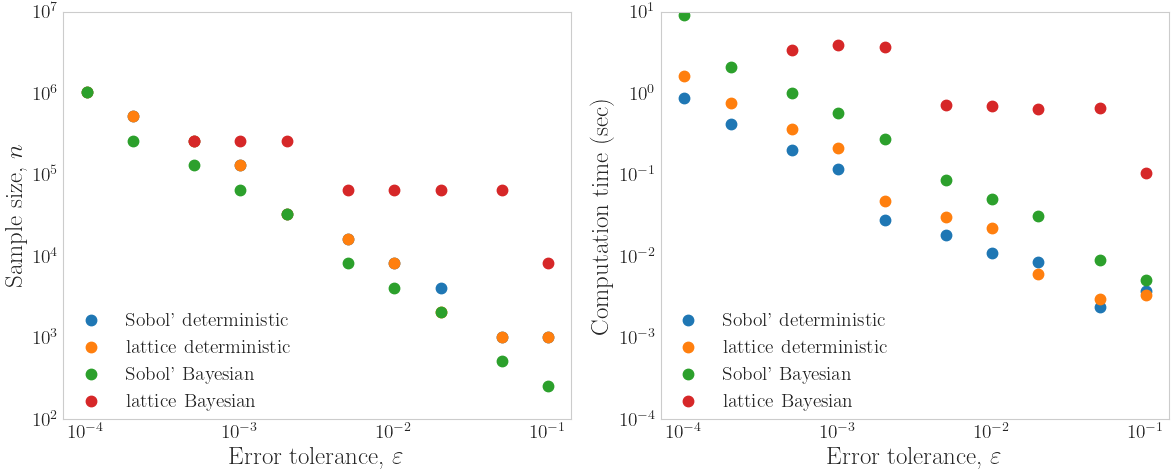

In [60]:
out_filename = f'Keister_d_{d}_tol_{tol_vec[-1]}_StoppingRule.pkl'
with open(figpath+out_filename,'rb') as myfile: 
    d,tol_vec,stop_crit,prob_elem,KeisterStoppingRule = pickle.load(myfile) #load in all the data


#Plot the errors and trend lines
keister_plt_lines_args = {"linewidth" : 3,
                         "markersize" : 15}
fig,ax = plt.subplots(1,2,figsize = (12,5))
for crit in stop_crit:
    ax[0].loglog(tol_vec, KeisterStoppingRule[crit]['n'],'.',label = KeisterStoppingRule[crit]['label'], \
                 **keister_plt_lines_args) #computational cost
    ax[1].loglog(tol_vec, KeisterStoppingRule[crit]['time'],'.',label = KeisterStoppingRule[crit]['label'], \
                 **keister_plt_lines_args) #computational time

for jj in range(2):
    ax[jj].set_xlabel("Error tolerance, $\\varepsilon$")
    ax[jj].legend(frameon = False, loc="lower left", fontsize=14)
    ax[jj].grid(False)

ax[0].set_ylabel("Sample size, $n$")
ax[1].set_ylabel("Computation time (sec)");
ax[0].set_ylim(10**2, 10**7)
ax[1].set_ylim(10**-4, 10)

if savefigs:
    plt.savefig(figpath+f"KeisterStopCriteria."+imgfrmt,format=imgfrmt,bbox_inches='tight')

# BREAK HERE

In [ ]:
sys.exit("Stopping execution")